In [ ]:
import torch
a=torch.tensor(11)
a.shape

In [ ]:
weight=torch.ones(16,768,16,16)
weight*torch.tensor(12)

In [2]:
import torch
Wq=torch.randint(0,255,(64,32,3,3))
# with open ('TxT//ConvWeight.txt','a') as ff:
#     #Wq的维度：[OC,IC,K,K]
#     for OC in range(Wq.shape[0]):#遍历全部输出通道
#         for K_Row in range(Wq.shape[2]):#遍历行
#             for K_Col in range(Wq.shape[3]):#遍历列
#                 for IC in range(0,Wq.shape[1],8):#遍历通道
#                     ff.write('%02x'%(int(Wq[OC,IC:IC+7,K_Row,K_Col].item())&0xff))
#                     ff.write("\n")
#     ff.close()
for OC in range(Wq.shape[0]):#遍历全部输出通道
    for K_Row in range(Wq.shape[2]):#遍历行
        for K_Col in range(Wq.shape[3]):#遍历列
            for IC in range(0,Wq.shape[1],8):#遍历通道
                # print(list(Wq[OC,IC:IC+2,K_Row,K_Col]))
                Hex0=Wq[OC,IC,K_Row,K_Col].item()&0xff
                Hex1=Wq[OC,IC+1,K_Row,K_Col].item()&0xff
                Hex2=Wq[OC,IC+2,K_Row,K_Col].item()&0xff
                Hex3=Wq[OC,IC+3,K_Row,K_Col].item()&0xff
                Hex4=Wq[OC,IC+4,K_Row,K_Col].item()&0xff
                Hex5=Wq[OC,IC+5,K_Row,K_Col].item()&0xff
                Hex6=Wq[OC,IC+6,K_Row,K_Col].item()&0xff
                Hex7=Wq[OC,IC+7,K_Row,K_Col].item()&0xff
                print('%02x%02x%02x%02x%02x%02x%02x%02x'%(Hex7,Hex6,Hex5,Hex4,Hex3,Hex2,Hex1,Hex0))
                # ff.write("\n")    

ValueError: only one element tensors can be converted to Python scalars

In [ ]:
import os
filename = r'E:\Transformer\Transformer_Arithmatic\Transformer_Main\TxT\Weight.txt'

# 判断文件是否存在不存在则创建一个
if not os.path.isfile(filename):
     fd = open(filename, mode="w", encoding="utf-8")


In [ ]:
import torch.nn as nn
picture_in=torch.rand(1,3,224,224)

nn.conv(picture_in)

In [ ]:
for i in range(0,32):
    print(i)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
Wq=torch.randint(0,10,(64,32,3,3),dtype=torch.float)
Xq=torch.randint(0,10,(1,32,322,322),dtype=torch.float)
# Xq=torch.rand(1,32,322,322)
ConvLayer=nn.Conv2d(32,64,3,bias=False,stride=2,padding=0)
ConvLayer.weight.data=Wq
Output=ConvLayer(Xq)
print(Output.shape)

In [12]:
import math
import torch
import numpy as np
def gen_B(S1, S2, S3):  # 第一组  β即N_REAL  +++++求shitf++++
    M = (S1 * S2) / S3
    M = M.numpy()

    daxiao = S2.shape[0]  # 第一层权重的shape[0]是32 shape[0]表示行数 是一维大小位32的列向量
    SCALE = np.zeros(daxiao, dtype=np.uint32, order='C')  # 相当于32个输出通道 每个对应一组shift
    N_REAL = np.zeros(daxiao, dtype=np.uint32, order='C')
    for i, ii in enumerate(M):  # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标

        while not (ii >= 0.5 and ii <= 1.0):  # 左移到（0.5，1） 左移一次相当于*2
            ii *= 2
        pass
        mmmm = ii * (2 ** 32)  # 乘2^32

        SCALE[i] = mmmm.astype(np.int32)#更新Scale放大后的值

    for i, ii in enumerate(M):#存在一个问题，如果shift为0怎么办？
        N_REAL[i] = round(math.log(SCALE[i] / ii, 2)) - 32 - 1  # fpga加了1这里要减1,  β值也是m维 相当于存的mmmm

    return N_REAL
S1=torch.rand(1)
S2=torch.rand(10)
S3=torch.rand(1)
gen_B(S1,S2,S3)

array([ 7,  6,  4,  5,  6,  9,  5, 11,  9,  4], dtype=uint32)

In [ ]:

def gen_M_N(S1, S2, S3):  # 第二组求M'即M  ++++++返回scale和shift+++++
    daxiao = S2.shape[0]
    M = np.zeros(daxiao, dtype=np.uint32, order='C')
    N_REAL = gen_B(S1, S2, S3)
    M = np.zeros(S2.shape[0])
    for i, ii in enumerate(M):
        M[i] = (torch.round((S1 * S2[i]) / S3 * (2 ** (32 + N_REAL[i] + 1)))).numpy()  # s1s2/s3 *2^(32+β+1)
    M = M.astype(np.uint32)
    # exit()
    return M, N_REAL


In [4]:
import torch
M=torch.randint(1,10,[1,10])
for i,ii in enumerate(M):
    print(ii)
# for i, ii in enumerate(M):  # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标
#     while not (ii >= 0.5 and ii <= 1.0):  # 左移到（0.5，1） 左移一次相当于*2
#         ii *= 2
#     pass
#     mmmm = ii * (2 ** 32)  # 乘2^32
#     SCALE[i] = mmmm.astype(np.int32)

tensor([5, 8, 3, 6, 9, 3, 2, 8, 6, 9])


In [22]:
print(torch.round(torch.tensor(2.5)))
torch.round(torch.tensor(1.5))

tensor(2.)


tensor(2.)

In [2]:
round(2.5)

2

In [16]:
#统计计算时间
import torch.nn as nn
import torch
import time
torch.cuda.is_available()

InChannel=8
OutChannel=768
FeatureSize=224
Device='cuda'
times=100000
net=nn.Conv2d(InChannel,OutChannel,16,bias=False,stride=16,padding=0)
input=torch.rand([1,InChannel,FeatureSize,FeatureSize])
net = net.to(Device)  # 网络模型
input = input.to(Device)  # 输入
start_event = torch.cuda.Event(enable_timing=True)
end_event = torch.cuda.Event(enable_timing=True)
# 记录开始事件
start_event.record()
# 执行卷积操作

for i in range(times):
    output = net(input)
# 记录结束事件并同步
end_event.record()
torch.cuda.synchronize()

# 计算执行时间（单位：毫秒）
elapsed_time = start_event.elapsed_time(end_event)

print(f"卷积操作在GPU上的执行时间为:{elapsed_time/times} 毫秒")

卷积操作在GPU上的执行时间为:0.4813615625 毫秒


In [21]:
#接着上面
Device='cpu'
times=1000
net=nn.Conv2d(InChannel,OutChannel,16,bias=False,stride=16,padding=0)
input=torch.rand([1,InChannel,FeatureSize,FeatureSize])
net = net.to(Device)  # 网络模型
input = input.to(Device)  # 输入
time_start = time.time()
for i in range(times):
    output = net(input)
time_end = time.time()
time_sum = time_end - time_start
print(time_sum)




9.392508268356323


In [22]:
import torch
import psutil

# 创建神经网络模型
model = net

# 将模型设置为在CPU上运行
device = torch.device('cpu')
model.to(device)

# 输入数据
input_data =input

# 开始监测CPU功耗
psutil.cpu_percent(interval=None, percpu=True)  # 初始化，获取初始CPU使用率
power_start = psutil.cpu_freq().current  # 获取初始CPU功耗

for i in range(times):
    output = net(input)

# 停止监测CPU功耗
power_end = psutil.cpu_freq().current  # 获取结束时的CPU功耗

# 计算平均功耗
average_power = (power_end - power_start) / psutil.cpu_count()

print(f"Average CPU power consumption: {average_power} MHz")

Average CPU power consumption: 0.0 MHz


In [16]:
x1=torch.rand(197,768)
x2=torch.rand(197,768)
error=x1-x2
print(error.sum())
(x1-x2).sum()

tensor(-21.5111)


tensor(-21.5111)

In [18]:
import torch
import torch.nn.functional as F

# 创建两个输入张量
tensor1 = torch.randn(1, 197, 786)
tensor2 = torch.randn(1, 197, 786)

# 将张量移动到GPU上（如果可用）
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tensor1 = tensor1.to(device)
tensor2 = tensor2.to(device)

# 将张量展平为二维矩阵
tensor1_flat = tensor1.view(1, -1)  # shape: [1, 155142]
tensor2_flat = tensor2.view(1, -1)  # shape: [1, 155142]

# 计算余弦相似度
similarity = F.cosine_similarity(tensor1_flat, tensor2_flat)

print("余弦距离:", similarity.item())

余弦距离:%d%d -0.0008845366537570953 -0.0008845366537570953


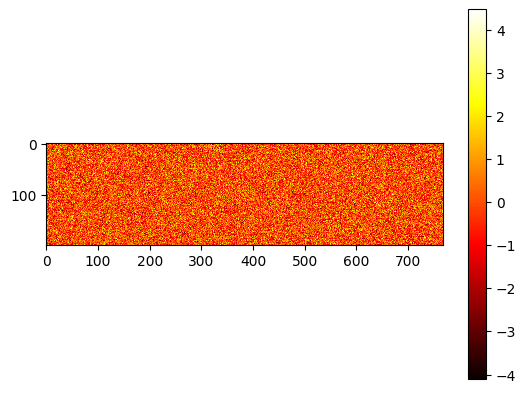

In [20]:
import torch
import matplotlib.pyplot as plt
# 创建一个示例矩阵
matrix = torch.randn(197, 768)
# 使用plt.imshow()显示热度图
plt.imshow(matrix, cmap='hot', interpolation='nearest')
# 添加颜色条
plt.colorbar()
# 显示图像
plt.show()

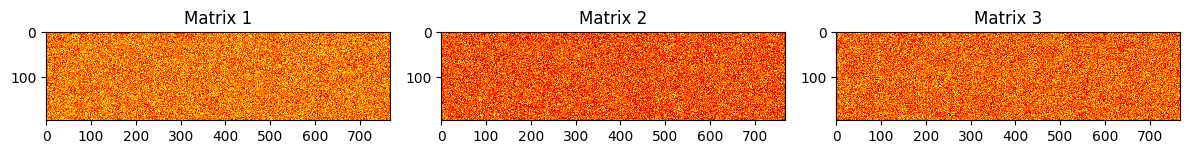

In [21]:
import torch
import matplotlib.pyplot as plt

# 创建三个示例矩阵
matrix1 = torch.randn(197, 768)
matrix2 = torch.randn(197, 768)
matrix3 = torch.randn(197, 768)

# 创建包含三个子图的图形
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# 在每个子图上显示热度图
axes[0].imshow(matrix1, cmap='hot', interpolation='nearest')
axes[0].set_title('Matrix 1')

axes[1].imshow(matrix2, cmap='hot', interpolation='nearest')
axes[1].set_title('Matrix 2')

axes[2].imshow(matrix3, cmap='hot', interpolation='nearest')
axes[2].set_title('Matrix 3')

# 调整子图之间的间距
plt.tight_layout()

# 显示图像
plt.show()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

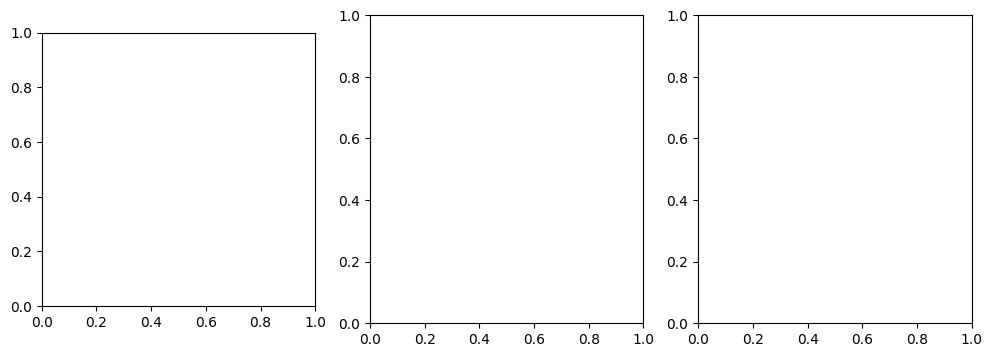

In [2]:
import torch
import matplotlib.pyplot as plt

def plot_heatmaps(matrices):
    num_matrices = len(matrices)

    # 创建包含子图的图形
    fig, axes = plt.subplots(1, num_matrices, figsize=(4*num_matrices, 4))

    for i in range(num_matrices):
        matrix = matrices[i]

        # 在每个子图上显示热度图
        axes[i].imshow(matrix, cmap='hot', interpolation='nearest')
        axes[i].set_title(f'Matrix {i+1}')

    # 调整子图之间的间距
    plt.tight_layout()

    # 显示图像
    plt.show()
matrix1 = torch.randn(1,197, 768).to('cuda')
matrix2 = torch.randn(1,197, 768).to('cuda')
matrix3 = torch.randn(1,197, 768).to('cuda')

matrices = [matrix1.squeeze(), matrix2.squeeze(), matrix3.squeeze()]
plot_heatmaps(matrices)    

In [5]:
import torch
import scipy.io as sio

def tensors_to_mat(tensors, file_path):
    # 创建一个字典，将变量名与对应的 NumPy 数组关联起来
    data = {}
    for i, tensor in enumerate(tensors):
        # 将张量转换为 NumPy 数组
        array = tensor.numpy()
        # 使用默认的变量名 "tensor" + 数字索引
        var_name = f'tensor{i+1}'
        data[var_name] = array

    # 保存为 .mat 文件
    sio.savemat(file_path, data)
    # 创建示例张量
tensor1 = torch.randn(197, 768)
tensor2 = torch.randn(197, 768)
tensor3 = torch.randn(197, 768)

# 调用函数将张量保存为 .mat 文件
tensors_to_mat([tensor1, tensor2, tensor3], 'tensors.mat')

# 量化

In [22]:
import torch
M=torch.rand(768,1,1,1,device="cuda")
M=M.cpu()

M = M.numpy()
daxiao = M.shape[0]  # 第一层权重的shape[0]是32 shape[0]表示行数 是一维大小位32的列向量

# SCALE = torch.zeros(daxiao)  # 相当于32个输出通道 每个对应一组shift
# N_REAL = np.zeros(daxiao, dtype=np.uint32, order='C')
# for i, ii in enumerate(M):  # enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标
#     while not (ii >= 0.5 and ii <= 1.0):  # 左移到（0.5，1） 左移一次相当于*2
#         ii *= 2
#     pass
#     mmmm = ii * (2 ** 32)  # 乘2^32
#     SCALE[i] = mmmm.astype(np.int32)
# for i, ii in enumerate(M):
#     N_REAL[i] = round(math.log(SCALE[i] / ii, 2)) - 32 - 1  # fpga加了1这里要减1,  β值也是m维 相当于存的mmmm
# return N_REAL

In [1]:
('{:024b}'.format(int(-12) & 0xffffff))

'111111111111111111110100'